In [9]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import interpolate
from scipy import stats
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.odr import ODR, Model, Data, RealData
from pylab import *
from openpyxl import Workbook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

In [2]:
data = pd.read_excel(r"H:\My Documents\GitHub\EPR-Code-and-Data\Phys-382-EPR\Lock-In data\EPR Lock-In Data.xlsx",None)
MagResonances = []
FreqResonances = []

In [3]:
def guassDerivative(x,a,b,c,d): # Where a is the height of a guass peak, b is the centre position and c is the s.d.
      return (a*(x-b)*(math.e)**((-((b-x)**2))/(2*c**2)))/(c**2) + d

In [4]:
def lorentzDerivative(x,a,b,c,d):
    return - (a * (1/math.pi) * c * (x-b)) / (((x-b)**2+0.25*c**2)**2) + d

In [5]:
def Linear(x,m,c):
    return m*x+c

[5.246530407709433, 1.220355, 0.3443312896186223, 0]
[5.79198586 1.22205343 0.4072527  6.28606434]


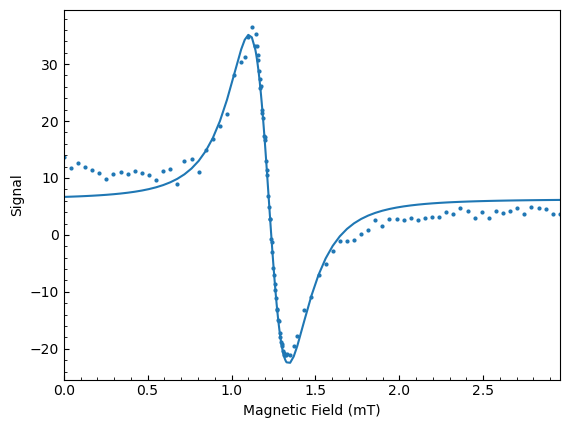

[7.234728109673251, 1.461465, 0.3736360802244622, 0]
[6.69610158 1.45684725 0.40904044 9.73381221]


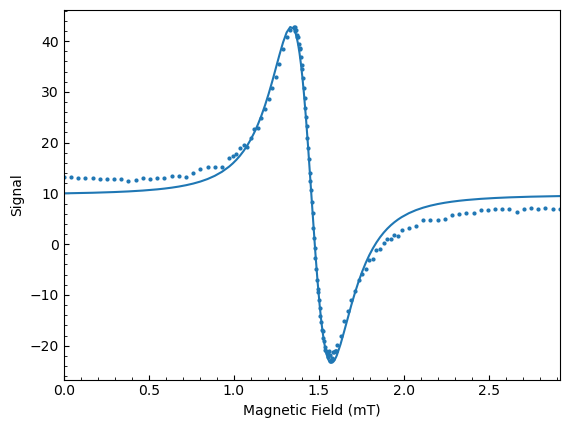

[6.796544102052926, 1.71738, 0.36630988257300223, 0]
[6.51840865 1.71192806 0.40938509 8.97497483]


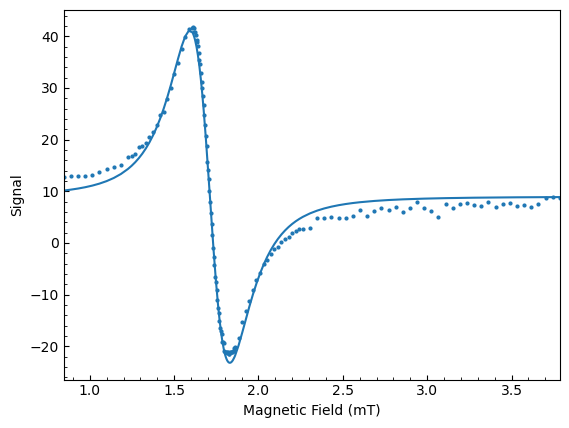

[6.283692394749012, 1.97118, 0.36630988257300223, 0]
[5.47826259 1.96873204 0.39636667 8.9311002 ]


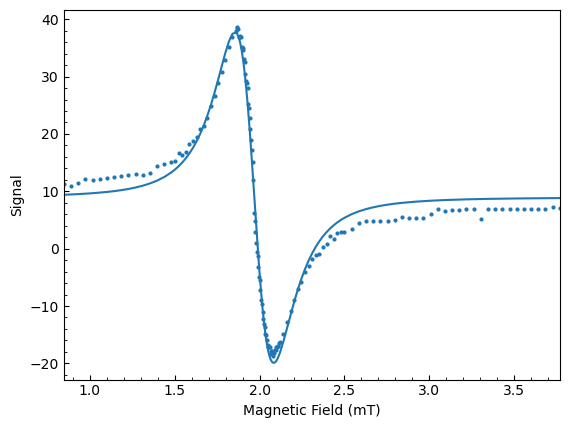

[5.567854079163652, 2.172105, 0.40294087083030244, 0]
[4.28115651 2.17953462 0.42239223 7.52102715]


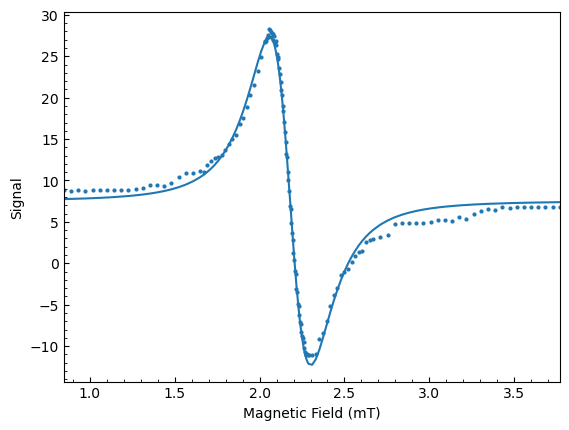

[9.463334901971765, 2.480895, 0.3882884755273825, 0]
[10.63313952  2.47931133  0.43745207  4.66467443]


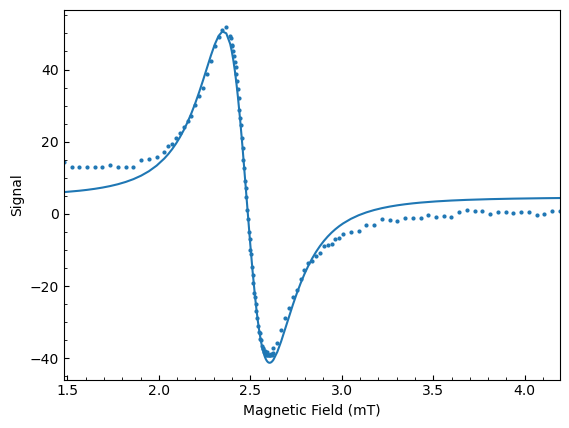

[17.30791877558851, 2.7346950000000003, 0.4322456614361423, 0]
[16.55770396  2.72945744  0.44334949  5.20117102]


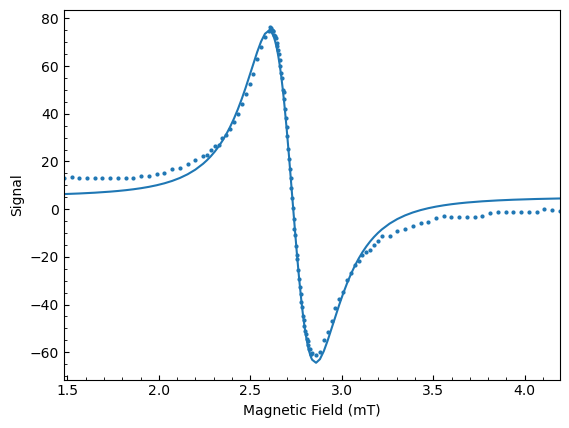

[19.681419349819734, 3.0117599999999998, 0.4395718590876019, 0]
[19.10844982  3.00390352  0.45998877  7.42805225]


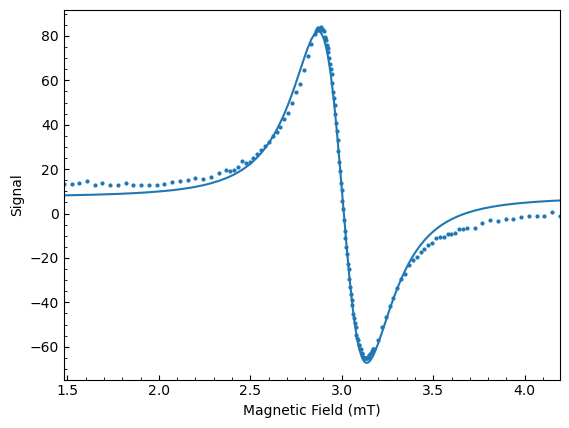

[18.440805695307287, 3.2380649999999997, 0.4175932661332231, 0]
[20.08706755  3.24363725  0.46879868  9.66122257]


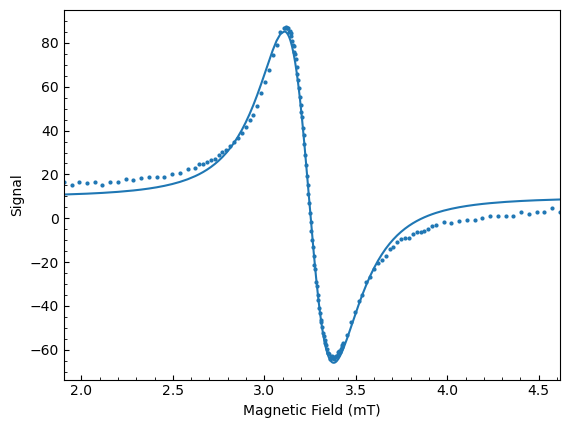

[21.712427709500034, 3.534165, 0.446898056739063, 0]
[21.3889278   3.52785944  0.47690025  8.7516661 ]


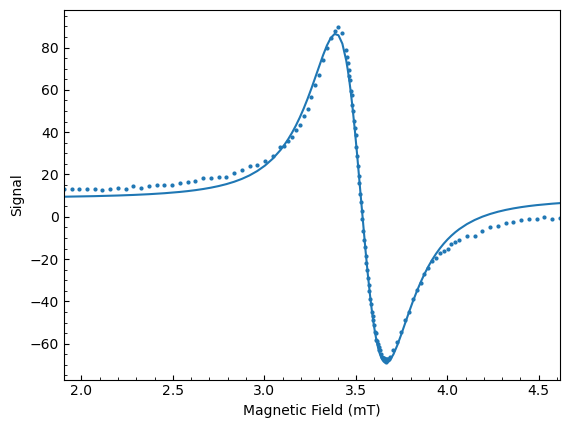

[26.927875892316383, 3.7752749999999997, 0.47620284734490287, 0]
[24.3828368   3.77574098  0.4840204   8.92825706]


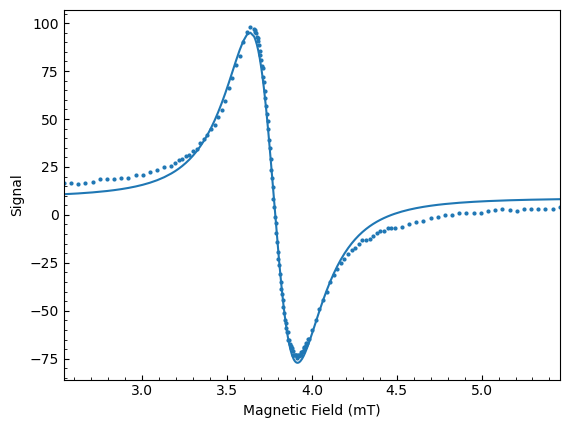

[22.84171027428017, 4.03542, 0.4981814402992832, 0]
[19.35688254  4.02527816  0.49561441  7.05273364]


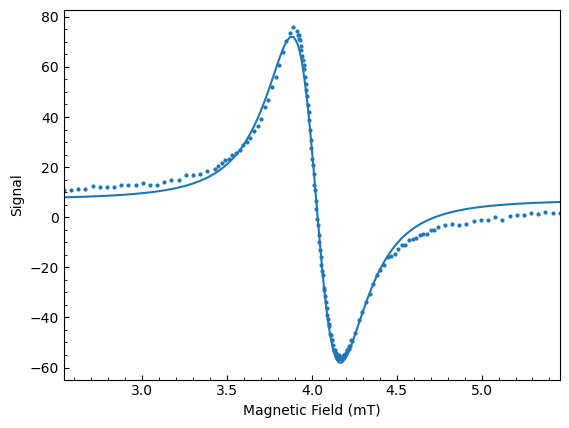

[17.888676922409058, 4.29344999999999, 0.5128338356021678, 0]
[15.10308554  4.28405572  0.51401454  5.05912451]


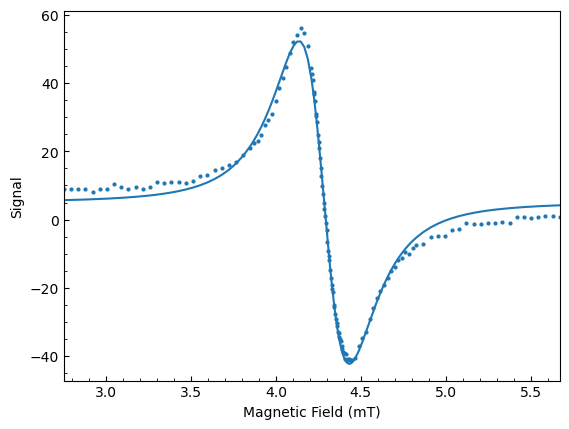

[24.98192813886092, 4.543019999999985, 0.4981814402992301, 0]
[22.36182444  4.53643777  0.52108849  9.49939349]


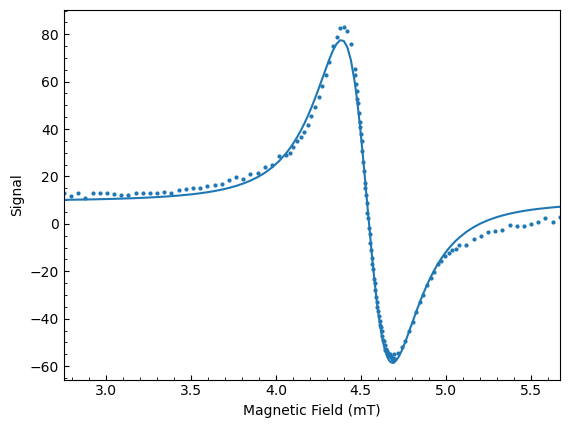

[1.222053429999554, 1.456847248259209, 1.711928060788766, 1.968732035156477, 2.1795346214707374, 2.4793113348620617, 2.729457441523171, 3.003903524370394, 3.2436372490730028, 3.527859442384762, 3.775740976867869, 4.02527816407944, 4.284055721493132, 4.53643777101826]
[18.4, 22.1, 26.0, 30.1, 33.5, 38.1, 42.0, 46.1, 49.8, 54.2, 58.1, 62.0, 66.0, 70.0]
[[0.0, 18.4, 13.704], [0.0423, 18.4, 11.758], [0.0846, 18.4, 12.597], [0.1269, 18.4, 11.84], [0.1692, 18.4, 11.488], [0.2115, 18.4, 10.943], [0.2538, 18.4, 9.89], [0.2961, 18.4, 10.699], [0.3384, 18.4, 11.012], [0.3807, 18.4, 10.656], [0.423, 18.4, 11.294], [0.4653, 18.4, 10.883], [0.5076, 18.4, 10.509], [0.5499, 18.4, 9.682], [0.5922, 18.4, 11.278], [0.6345, 18.4, 11.609], [0.6768, 18.4, 8.998], [0.7191, 18.4, 12.947], [0.7614, 18.4, 13.252], [0.8037, 18.4, 11.027], [0.846, 18.4, 14.868], [0.8883, 18.4, 16.845], [0.9306, 18.4, 19.106], [0.9729, 18.4, 21.176], [1.0152, 18.4, 28.06], [1.0575, 18.4, 30.402], [1.07865, 18.4, 31.181], [1.0998,

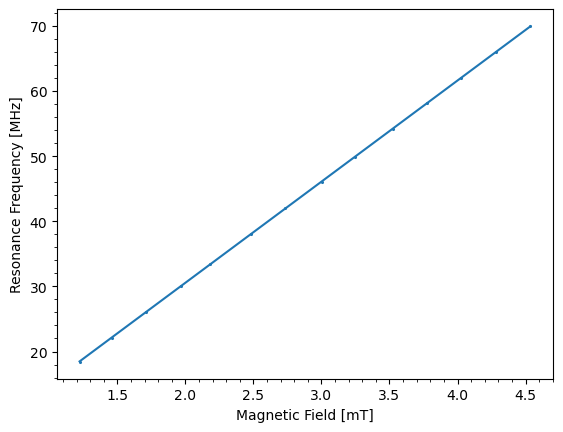

In [11]:
MagResonances = []
FreqResonances = []
threeDData = []

for i, sheet in enumerate(data):


        
        if "test" not in sheet.lower():
            AmpData = (data[sheet]["Amplitude"]).to_numpy()
            MagneticData = (data[sheet]["MagField"]).to_numpy()  

            maxLoc = MagneticData[np.argmax(AmpData)]
            minLoc = MagneticData[np.argmin(AmpData)]
            centre = (minLoc-maxLoc)/2 + maxLoc

            guessGuass =[-(np.max(AmpData)/0.60653)*minLoc-maxLoc,centre, ((minLoc-maxLoc)/2),0]
            guessLorentz = [((np.max(AmpData))*(((minLoc-maxLoc)/2)/0.28869)**2)/0.826,centre, ((minLoc-maxLoc)/2)/0.28869,0]

            print(guessLorentz)

            funcUsed = lorentzDerivative

            popt, pcov = scipy.optimize.curve_fit(funcUsed, MagneticData, AmpData, p0=guessLorentz) 

            print(popt)

            Amp, Loc, SDev,d = popt
            AmpGuess,LocGuess,SDevGuess,d2 = guessLorentz
            signalData = funcUsed(MagneticData,Amp,Loc,SDev,d)
            fig, ax = plt.subplots() 
            ax.plot(MagneticData,signalData)
            ax.scatter(MagneticData,AmpData,s=4)
            ax.set_xlabel("Magnetic Field (mT)")
            ax.set_ylabel("Signal")
            ax.set_xlim(left=MagneticData[0],right = MagneticData[-1])
            ax.tick_params(which='both',direction = 'in')
            ax.minorticks_on()

            for magRes,Ampls in zip(MagneticData,AmpData):
                  threeDData.append([magRes,float(sheet),Ampls])
            #plt.xticks(np.linspace(np.min(MagneticData),np.max(MagneticData),10))
            #plt.yticks(np.linspace(np.min(signalData),np.max(signalData),10))

            plt.show()

          

            #MagResonances.append((minLoc-maxLoc)/2 + maxLoc)
            MagResonances.append(Loc)
            FreqResonances.append(float(sheet))

            




print(MagResonances)
print(FreqResonances)
print(threeDData)


guessLinear = [12,0]
popt, pcov = scipy.optimize.curve_fit(Linear, MagResonances, FreqResonances, p0=guessLinear)

plot,ax = plt.subplots()
ax.scatter(MagResonances,FreqResonances,marker = ".",s=6)

ax.set_xlabel("Magnetic Field [mT]")
ax.set_ylabel("Resonance Frequency [MHz]")

ax.minorticks_on()

ax.plot(MagResonances,Linear(np.array(MagResonances),popt[0],popt[1]))

plt.show()

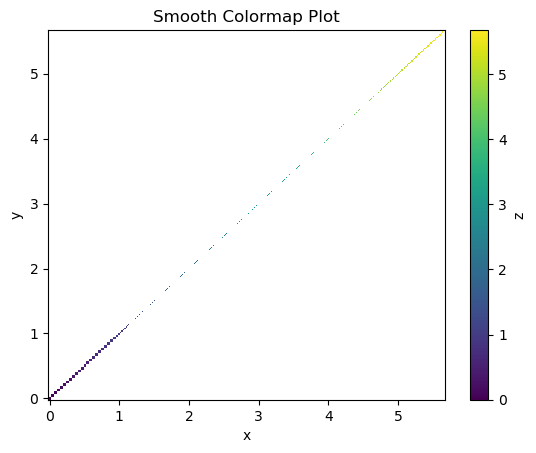

In [23]:
# 3D code Plot



def plot_smooth_colormap(x, y, z):
    # Get unique x and y values
    unique_x, unique_y = np.unique(x), np.unique(y)
    
    # Create grid of x and y values
    X, Y = np.meshgrid(unique_x, unique_y)
    
    # Initialize Z matrix
    Z = np.zeros_like(X)
    
    # Fill in Z matrix with corresponding z values
    for i, xi in enumerate(unique_x):
        for j, yj in enumerate(unique_y):
            mask = (x == xi) & (y == yj)
            if np.any(mask):
                Z[j, i] = z[mask][0]
            else:
                Z[j, i] = np.nan

    # Create a smooth colormap
    plt.figure()
    plt.pcolormesh(X, Y, Z, cmap='viridis')
    plt.colorbar(label='z')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Smooth Colormap Plot')
    plt.show()

xData = []
yData = []
zData = []
for element in threeDData:
    xData.append(element[0])
    yData.append(element[1])
    zData.append(element[2])

xData = np.array(xData)
yData = np.array(xData)
zData = np.array(xData)

plot_smooth_colormap(xData,yData,zData)

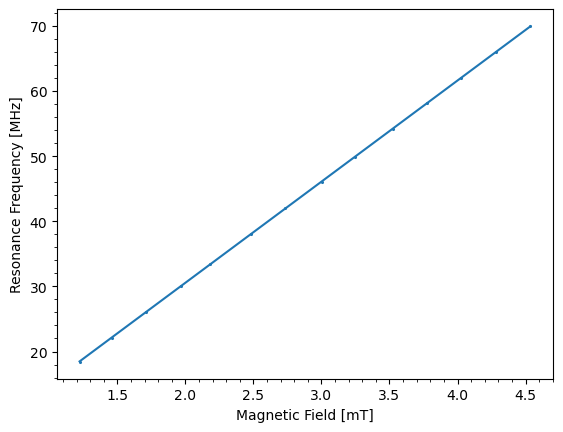

-0.4996884063710673
-0.4997
Linear fit has the equation y = (15.5287±0.021)x (-0.4997±0.064)


In [7]:
#2D MagField vs Resonance

guessLinear = [12,0]
popt, pcov = scipy.optimize.curve_fit(Linear, MagResonances, FreqResonances, p0=guessLinear)

perr = np.sqrt(np.diag(pcov))

plot,ax = plt.subplots()
ax.scatter(MagResonances,FreqResonances,marker = ".",s=6)

ax.set_xlabel("Magnetic Field [mT]")
ax.set_ylabel("Resonance Frequency [MHz]")

ax.minorticks_on()

ax.plot(MagResonances,Linear(np.array(MagResonances),popt[0],popt[1]))

plt.show()

popt2 = []
perr2 = []
for element1 in popt:
    popt2.append(np.format_float_positional(element1,precision=4))

for element2 in perr:
    perr2.append(np.format_float_positional(element2,precision=3))

print(popt[1])
print(popt2[1])


print("Linear fit has the equation y = ({}±{})x ({}±{})".format(popt2[0],perr2[0],popt2[1],perr2[1]))